# DAT 802 Mandatory Assignment 1

---




## Students
Stian Hegna

Lill-Kristin Karlsen

Vidar Hardeland

Ketil Moland Olsen

# Question 1

* Read the exercise 1 file
* Skip lines 4 and 6 and write the resting concept as new txt file
* Skills: read/write in txt file

In [1]:
# Define file names
read_filepath = ("exercise1_input.txt")
write_filepath = ("exercise1_output.txt")

# Routine that reads all lines from text file except the ones specified.
def readLinesExcept(skiplines):
  lines = []
  with open(read_filepath,"r") as read_text_file:
    for count, line in enumerate(read_text_file):
      if ((count + 1) not in skiplines):
        lines.append(line)
  read_text_file.close()
  return lines

# Write lines from list to text file
def writeLines(lines):
  with open(write_filepath,"w") as write_text_file:
    for line in lines:
      write_text_file.writelines(line)
  write_text_file.close()

# Read lines from text file except line 4 and 6, then write the result to new text file.
writeLines(readLinesExcept([4,6]))

# Question 2

* Show here line charts for
* y=x
* y=x**2
* y=x**3
* Show legend
* Save figure as a pdf file
* Skills: plot line chart

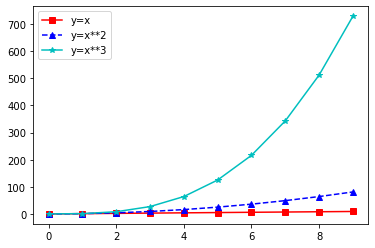

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

x = np.arange(10)
y = x
y1 = x**2
y2 = x**3

plt.plot(x,y, 'rs-', label='y=x')
plt.plot(x,y1, 'b^--', label='y=x**2')
plt.plot(x,y2, 'c*-', label='y=x**3')
plt.legend(loc=0)

plt.savefig('chart.pdf')


# Question 3

* Read sales-data.csv file
* Plot scatter charts for (1) toothpaste, (2) bathingsoap
* X-axis is the month
* Show legend
* Save file as a pdf file
* Skills: read csv, plot scatter chart

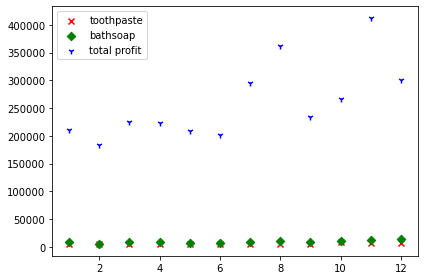

In [3]:
from pandas.io.formats.info import DataFrameInfo
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

filepath = 'sales-data.csv'
dframe = pd.read_csv(filepath)
dframe = dframe.reset_index()

plt.scatter(dframe['month_number'], dframe['toothpaste'], color='r', marker='x', label='toothpaste')
plt.scatter(dframe['month_number'], dframe['bathingsoap'], color='g', marker='D', label='bathsoap')
plt.scatter(dframe['month_number'], dframe['total_profit'], color='b', marker='1', label='total profit')
plt.legend(loc=0)
plt.tight_layout()

plt.savefig('scatter.pdf')

  
  
  

# Question 4

* Write the following json style to the file
* Print it out on the screen
* Skills: read/write json file

In [4]:
# Loading required/preferred libraries:
import json

# First specifying the location of the files for reading and writing
path = "."
file = "employees.json"

# Creating dictionary with employees
d_emp = {"emp1": {
                "name": "Mary", 
                "title": "Programmer", 
                "age": "34", 
                "salary": "50,000"}
                , 
        "emp2": { 
                "name": "John", 
                "title": "Manager", 
                "age": "40", 
                "salary": "66,000"}
        }

# Printing employees to json file
with open(path + file, 'w') as json_file:
    writer = json.dump(d_emp, json_file, indent = 4)

# Reading employees and printing with json pretty print
with open (path + file, 'r') as json_file:
    lines = json.load(json_file)
    print(json.dumps(lines, indent = 4))




{
    "emp1": {
        "name": "Mary",
        "title": "Programmer",
        "age": "34",
        "salary": "50,000"
    },
    "emp2": {
        "name": "John",
        "title": "Manager",
        "age": "40",
        "salary": "66,000"
    }
}


# Question 5

* Using yahoo finance to parse Telsa’s stok price by years (x: year, y:price)
* Show the line charts of close price, open price, and high price
* Find the highest and lowest prices of three categories
* Using polynomial regression with degree 2 to find the regression line
* Show the slope and intercept
* Save figure as a pdf file
* Skills: json application, regression model

Lowest price of open: 36.22  Highest price of open: 1234.41
Lowest price of close: 35.79  Highest price of close: 1229.91
Lowest price of high: 37.34  Highest price of high: 1243.49
Slope: [ 0.00000000e+00 -2.48897264e-04  8.11952502e-14]
Intercept: 190755.89208141365


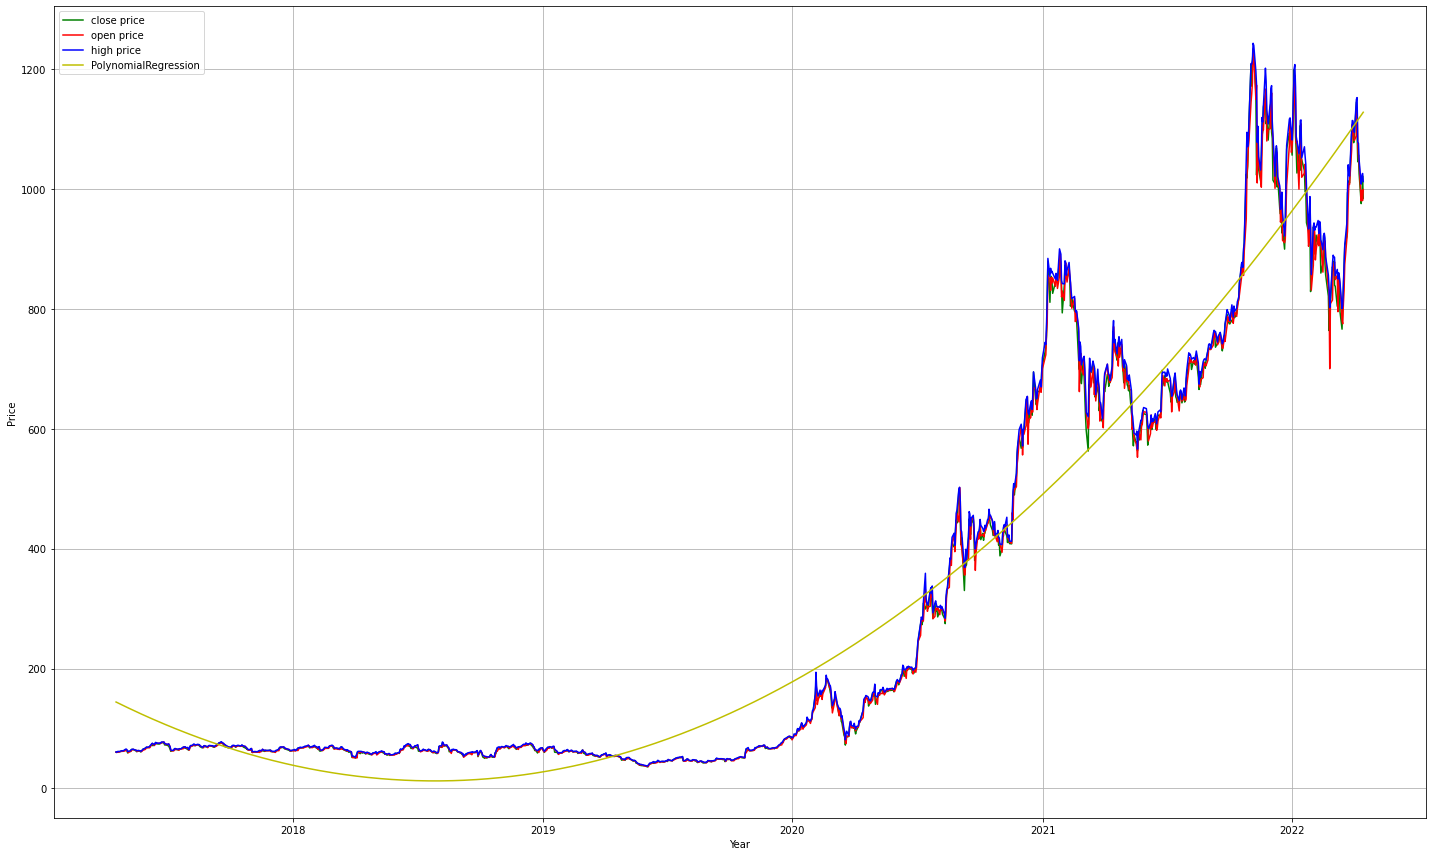

In [5]:
import urllib.request
import json
from matplotlib import pyplot as plt
import pandas as pd

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

url = "https://query1.finance.yahoo.com/v8/finance/chart/TSLA?region=US&lang=en-US&includePrePost=false&interval=1d&useYfid=true&range=5y&corsDomain=finance.yahoo.com&.tsrc=finance"

json_url = urllib.request.urlopen(url)
json_file = json.loads(json_url.read())
#print(json.dumps(json_file, indent=4))

pd_file = pd.DataFrame.from_dict(json_file)

datetime_x = pd.to_datetime(pd_file['chart']['result'][0]['timestamp'],unit='s')
timestamp_x = pd_file['chart']['result'][0]['timestamp']
close_price_y = pd_file['chart']['result'][0]['indicators']['quote'][0]['close']
open_price_y = pd_file['chart']['result'][0]['indicators']['quote'][0]['open']
high_price_y = pd_file['chart']['result'][0]['indicators']['quote'][0]['high']

df = pd.DataFrame({'time': datetime_x, 'timestamp': timestamp_x, 'close': close_price_y, 'open': open_price_y, 'high': high_price_y})

polynomial_features = PolynomialFeatures(degree=2, include_bias=True)
x_poly = polynomial_features.fit_transform(df['timestamp'].values.reshape(-1, 1))

model = LinearRegression()
model.fit(x_poly, df['close'])
y_poly_pred = model.predict(x_poly)

fig = plt.figure(figsize=(20, 12))
plt.grid(True)
plt.plot(df['time'], df['close'], 'g-', label='close price')
plt.plot(df['time'], df['open'], 'r-', label='open price')
plt.plot(df['time'], df['high'], 'b-', label='high price')
plt.plot(df['time'], y_poly_pred, 'y-', label='PolynomialRegression')

#plt.plot(datetime_x,close_price_y, 'g-', label='close price')
#plt.plot(datetime_x,open_price_y, 'r-', label='open price')
#plt.plot(datetime_x,high_price_y, 'b-', label='high price',)

plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(loc="upper left")
plt.tight_layout()

plt.savefig('tesla.pdf')

# Print out lowest and highest values for the three categories. 
print('Lowest price of open:', round(min(open_price_y), 2), ' Highest price of open:', round(max(open_price_y), 2))
print('Lowest price of close:', round(min(close_price_y), 2), ' Highest price of close:', round(max(close_price_y), 2))
print('Lowest price of high:', round(min(high_price_y), 2), ' Highest price of high:', round(max(high_price_y), 2))

# Pint out slope and intercept
print('Slope:', model.coef_)
print('Intercept:', model.intercept_)
